In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
lin_reg = linear_model.LinearRegression()


In [86]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")

In [40]:
"""
Pregnancies : 임신 경험 횟수
Glucose : 혈당 수치
BloodPressure : 혈압
SkinThickness : 삼두근 팔뚝살 두께
Insulin : 인슐린 수치
BMI(body mass index) : 체질량지수
DiabetesPedigreeFunction : 당뇨 가족력
Outcome : 1 <- 당뇨병, 0 <- 당뇨병 x
"""

'\nPregnancies : 임신 경험 횟수\nGlucose : 혈당 수치\nBloodPressure : 혈압\nSkinThickness : 삼두근 팔뚝살 두께\nInsulin : 인슐린 수치\nBMI(body mass index) : 체질량지수\nDiabetesPedigreeFunction : 당뇨 가족력\nOutcome : 1 <- 당뇨병, 0 <- 당뇨병 x\n'

In [87]:
df_diabete = pd.read_csv("diabetes.csv")
df_diabete

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [88]:
df_diabete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
df_diabete['Age'].min()

21

In [90]:
df_diabete['Age'].max()

81

In [91]:
age_bins = list(range(19,99, 10))
age_bins

[19, 29, 39, 49, 59, 69, 79, 89]

In [92]:
age_labels = ['20대', '30대', '40대', '50대', '60대', '70대','80대']

In [93]:
df_diabete['AgeGroup'] = pd.cut(df_diabete['Age'], bins=age_bins,labels=age_labels)
df_diabete


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup
0,6,148,72,35,0,33.6,0.627,50,1,50대
1,1,85,66,29,0,26.6,0.351,31,0,30대
2,8,183,64,0,0,23.3,0.672,32,1,30대
3,1,89,66,23,94,28.1,0.167,21,0,20대
4,0,137,40,35,168,43.1,2.288,33,1,30대
...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,60대
764,2,122,70,27,0,36.8,0.340,27,0,20대
765,5,121,72,23,112,26.2,0.245,30,0,30대
766,1,126,60,0,0,30.1,0.349,47,1,40대


In [94]:
"""
bmi 18.5 미만 : underweight
    18.5~ 22.9 : normal
    23  ~ 24.9 : overweight
    25  ~ 29.9 : obesity_1lv
    30  ~ 39.9 : obesity_2lv
    40 ~       : seriousness


"""

'\nbmi 18.5 미만 : underweight\n    18.5~ 22.9 : normal\n    23  ~ 24.9 : overweight\n    25  ~ 29.9 : obesity_1lv\n    30  ~ 39.9 : obesity_2lv\n    40 ~       : seriousness\n\n\n'

In [95]:
df_diabete['BMI'].min()

0.0

In [96]:
df_diabete['BMI'].max()

67.1

In [51]:
#bmi_bins = [0,18.5,23,30,25,40,70]
#bmi_labels = ['underweight', 'normal', 'overweight', 'obsesity_1lv', 'obsesity_2lv', 'seriousness']
#df_diabete['BMI_cat'] = pd.cut(df_diabete.BMI, bins = bmi_bins, labels=bmi_labels)

In [97]:
df_diabete.loc[df_diabete['BMI'] < 18.5, 'BMI_cat'] = 'underweight'
df_diabete.loc[(df_diabete['BMI'] >= 18.5)&(df_diabete['BMI']<=22.9), 'BMI_cat'] = 'normal'
df_diabete.loc[(df_diabete['BMI'] >= 23)&(df_diabete['BMI']<=24.9), 'BMI_cat'] = 'overweight'
df_diabete.loc[(df_diabete['BMI'] >= 25)&(df_diabete['BMI']<=29.9), 'BMI_cat'] = 'obesity_1lv'
df_diabete.loc[(df_diabete['BMI'] >= 30)&(df_diabete['BMI']<=39.9), 'BMI_cat'] = 'obesity_2lv'
df_diabete.loc[df_diabete['BMI'] >= 40, 'BMI_cat'] = 'seriousness'

In [98]:
df_diabete

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMI_cat
0,6,148,72,35,0,33.6,0.627,50,1,50대,obesity_2lv
1,1,85,66,29,0,26.6,0.351,31,0,30대,obesity_1lv
2,8,183,64,0,0,23.3,0.672,32,1,30대,overweight
3,1,89,66,23,94,28.1,0.167,21,0,20대,obesity_1lv
4,0,137,40,35,168,43.1,2.288,33,1,30대,seriousness
...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,60대,obesity_2lv
764,2,122,70,27,0,36.8,0.340,27,0,20대,obesity_2lv
765,5,121,72,23,112,26.2,0.245,30,0,30대,obesity_1lv
766,1,126,60,0,0,30.1,0.349,47,1,40대,obesity_2lv


In [99]:
df_diabete.groupby('AgeGroup').BloodPressure.mean() #연령대별 혈압 평균

AgeGroup
20대    65.348485
30대    69.666667
40대    73.940678
50대    79.807018
60대    78.275862
70대    41.000000
80대    74.000000
Name: BloodPressure, dtype: float64

In [100]:
df_diabete.groupby('AgeGroup').BloodPressure.median() #연령대별 혈압 중위수

AgeGroup
20대    68
30대    74
40대    76
50대    78
60대    78
70대    41
80대    74
Name: BloodPressure, dtype: int64

In [101]:
df_diabete[df_diabete.BloodPressure == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMI_cat
7,10,115,0,0,0,35.3,0.134,29,0,20대,obesity_2lv
15,7,100,0,0,0,30.0,0.484,32,1,30대,obesity_2lv
49,7,105,0,0,0,0.0,0.305,24,0,20대,underweight
60,2,84,0,0,0,0.0,0.304,21,0,20대,underweight
78,0,131,0,0,0,43.2,0.270,26,1,20대,seriousness
81,2,74,0,0,0,0.0,0.102,22,0,20대,underweight
172,2,87,0,23,0,28.9,0.773,25,0,20대,obesity_1lv
193,11,135,0,0,0,52.3,0.578,40,1,40대,seriousness
222,7,119,0,0,0,25.2,0.209,37,0,30대,obesity_1lv
261,3,141,0,0,0,30.0,0.761,27,1,20대,obesity_2lv


### 2~40대의 경우 혈압의 결측값이 많기 때문에, 평균대신 중위수로 대체

In [102]:
#20대 중 혈압이 0인 값을 20대 혈압의 중위수인 68을 치환
bp_0 = df_diabete['BloodPressure'] == 0
age_20 = df_diabete['AgeGroup'] == '20대'
df_diabete[bp_0 & age_20]
df_diabete['BloodPressure'].replace(0, 68, inplace = True)


In [103]:
#30대 중 혈압이 0인 값을 30대 혈압의 중위수인 74을 치환
bp_0 = df_diabete['BloodPressure'] == 0
age_30 = df_diabete['AgeGroup'] == '30대'
df_diabete[bp_0 & age_30]
df_diabete['BloodPressure'].replace(0, 74, inplace = True)

In [104]:
#40대 중 혈압이 0인 값을 40대 혈압의 중위수인 76을 치환
bp_0 = df_diabete['BloodPressure'] == 0
age_40 = df_diabete['AgeGroup'] == '40대'
df_diabete[bp_0 & age_40]
df_diabete['BloodPressure'].replace(0, 76, inplace = True)

In [105]:
#50대 중 혈압이 0인 값을 50대 혈압의 중위수인 78을 치환
bp_0 = df_diabete['BloodPressure'] == 0
age_50 = df_diabete['AgeGroup'] == '50대'
df_diabete[bp_0 & age_50]
df_diabete['BloodPressure'].replace(0, 78, inplace = True)

In [106]:
#60대 중 혈압이 0인 값을 60대 혈압의 중위수인 78을 치환
bp_0 = df_diabete['BloodPressure'] == 0
age_60 = df_diabete['AgeGroup'] == '60대'
df_diabete[bp_0 & age_60]
df_diabete['BloodPressure'].replace(0, 78, inplace = True)

In [107]:
#70대 중 혈압이 0인 값을 70대 혈압의 중위수인 41을 치환
bp_0 = df_diabete['BloodPressure'] == 0
age_70 = df_diabete['AgeGroup'] == '70대'
df_diabete[bp_0 & age_70]
df_diabete['BloodPressure'].replace(0, 41, inplace = True)

In [108]:
#80대 중 혈압이 0인 값을 80대 혈압의 중위수인 74을 치환
bp_0 = df_diabete['BloodPressure'] == 0
age_80 = df_diabete['AgeGroup'] == '80대'
df_diabete[bp_0 & age_80]
df_diabete['BloodPressure'].replace(0, 74, inplace = True)

In [109]:
df_diabete.groupby('AgeGroup').BMI.mean() #연령대별 혈압 평균

AgeGroup
20대    31.390404
30대    32.472121
40대    34.617797
50대    31.338596
60대    28.710345
70대    26.050000
80대    25.900000
Name: BMI, dtype: float64

In [110]:
df_diabete.groupby('AgeGroup').BMI.median() #연령대별 혈압 중위수

AgeGroup
20대    31.20
30대    32.00
40대    33.95
50대    32.80
60대    28.80
70대    26.05
80대    25.90
Name: BMI, dtype: float64

In [111]:
df_diabete[df_diabete.BMI==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMI_cat
9,8,125,96,0,0,0.0,0.232,54,1,50대,underweight
49,7,105,68,0,0,0.0,0.305,24,0,20대,underweight
60,2,84,68,0,0,0.0,0.304,21,0,20대,underweight
81,2,74,68,0,0,0.0,0.102,22,0,20대,underweight
145,0,102,75,23,0,0.0,0.572,21,0,20대,underweight
371,0,118,64,23,89,0.0,1.731,21,0,20대,underweight
426,0,94,68,0,0,0.0,0.256,25,0,20대,underweight
494,3,80,68,0,0,0.0,0.174,22,0,20대,underweight
522,6,114,68,0,0,0.0,0.189,26,0,20대,underweight
684,5,136,82,0,0,0.0,0.640,69,0,60대,underweight


In [112]:
#20대 BMI가 0인 값들을 20대의 BMI평균값으로 치환
bmi_0 = df_diabete['BMI'] == 0
age_20 = df_diabete['AgeGroup'] == '20대'
df_diabete[bmi_0 & age_20]
df_diabete['BMI'].replace(0, 31.390404, inplace = True)


In [113]:
#30대 BMI가 0인 값들을 30대의 BMI평균값으로 치환
bmi_0 = df_diabete['BMI'] == 0
age_30 = df_diabete['AgeGroup'] == '30대'
df_diabete[bmi_0 & age_30]
df_diabete['BMI'].replace(0, 32.472121, inplace = True)


In [114]:
#50대 BMI가 0인 값들을 50대의 BMI평균값으로 치환
bmi_0 = df_diabete['BMI'] == 0
age_50 = df_diabete['AgeGroup'] == '50대'
df_diabete[bmi_0 & age_50]
df_diabete['BMI'].replace(0, 31.338596, inplace = True)

In [115]:
#60대 BMI가 0인 값들을 60대의 BMI평균값으로 치환
bmi_0 = df_diabete['BMI'] == 0
age_60 = df_diabete['AgeGroup'] == '60대'
df_diabete[bmi_0 & age_60]
df_diabete['BMI'].replace(0, 28.710345, inplace = True)

In [116]:
df_diabete[df_diabete.Glucose ==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMI_cat
75,1,0,48,20,0,24.7,0.140,22,0,20대,overweight
182,1,0,74,20,23,27.7,0.299,21,0,20대,obesity_1lv
342,1,0,68,35,0,32.0,0.389,22,0,20대,obesity_2lv
349,5,0,80,32,0,41.0,0.346,37,1,30대,seriousness
502,6,0,68,41,0,39.0,0.727,41,1,40대,obesity_2lv


In [117]:
df_diabete[df_diabete.BloodPressure ==48].Glucose.mean() #80
df_diabete[df_diabete.BloodPressure ==74].Glucose.mean() #121.17307692307692
df_diabete[df_diabete.BloodPressure == 68].Glucose.mean() #115.7625
df_diabete[df_diabete.BloodPressure ==80].Glucose.mean() #112.65

112.65

In [118]:
#혈압이 일치할시 가장 데이터가 많아 혈압을 기준으로 혈당의 평균을 구함


glu_0 = df_diabete['Glucose'] == 0
bp_48 = df_diabete['BloodPressure'] == 48
df_diabete[bmi_0 & bp_48]
df_diabete['Glucose'].replace(0, 80, inplace = True)

glu_0 = df_diabete['Glucose'] == 0
bp_74 = df_diabete['BloodPressure'] == 74
df_diabete[bmi_0 & bp_74]
df_diabete['Glucose'].replace(0, 121, inplace = True)

glu_0 = df_diabete['Glucose'] == 0
bp_68 = df_diabete['BloodPressure'] == 68
df_diabete[bmi_0 & bp_74]
df_diabete['Glucose'].replace(0, 116, inplace = True)

glu_0 = df_diabete['Glucose'] == 0
bp_80 = df_diabete['BloodPressure'] == 80
df_diabete[bmi_0 & bp_80]
df_diabete['Glucose'].replace(0, 113, inplace = True)

In [119]:
df_diabete[df_diabete.SkinThickness == 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMI_cat
2,8,183,64,0,0,23.300000,0.672,32,1,30대,overweight
5,5,116,74,0,0,25.600000,0.201,30,0,30대,obesity_1lv
7,10,115,68,0,0,35.300000,0.134,29,0,20대,obesity_2lv
9,8,125,96,0,0,31.390404,0.232,54,1,50대,underweight
10,4,110,92,0,0,37.600000,0.191,30,0,30대,obesity_2lv
...,...,...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.300000,0.258,52,1,50대,obesity_2lv
758,1,106,76,0,0,37.500000,0.197,26,0,20대,obesity_2lv
759,6,190,92,0,0,35.500000,0.278,66,1,60대,obesity_2lv
762,9,89,62,0,0,22.500000,0.142,33,0,30대,normal


In [121]:
df_diabete[df_diabete.SkinThickness == 99] # 99도 결측치 인것같아 치환

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,BMI_cat
579,2,197,70,99,0,34.7,0.575,62,1,60대,obesity_2lv


In [123]:
df_diabete['SkinThickness'].replace(99, 28.0, inplace = True)

In [124]:
df_diabete.groupby('BMI_cat').SkinThickness.mean()

BMI_cat
normal          9.369565
obesity_1lv    16.474860
obesity_2lv    23.449198
overweight     11.160714
seriousness    29.040816
underweight     5.333333
Name: SkinThickness, dtype: float64

In [126]:
df_diabete.groupby('BMI_cat').SkinThickness.median()

BMI_cat
normal         11.5
obesity_1lv    19.0
obesity_2lv    28.0
overweight     14.0
seriousness    36.5
underweight     0.0
Name: SkinThickness, dtype: float64

In [127]:
#BMI_cat 레벨별 중위수로 치환 #데이터 값이 0인 데이터가 많아 평균값보다는 중위수가 나을것같다는 판단을 하여 사용
sk_0 = df_diabete['SkinThickness'] == 0
bmi_nor = df_diabete['BMI_cat'] == 'normal'
df_diabete[sk_0 & bmi_nor]
df_diabete['SkinThickness'].replace(0, 11.5, inplace = True)

In [128]:
sk_0 = df_diabete['SkinThickness'] == 0
bmi_ob1 = df_diabete['BMI_cat'] == 'obesity_1lv'
df_diabete[sk_0 & bmi_ob1]
df_diabete['SkinThickness'].replace(0, 19.0, inplace = True)

In [129]:
sk_0 = df_diabete['SkinThickness'] == 0
bmi_ob2 = df_diabete['BMI_cat'] == 'obesity_2lv'
df_diabete[sk_0 & bmi_ob2]
df_diabete['SkinThickness'].replace(0, 23.639037, inplace = True)

In [130]:
sk_0 = df_diabete['SkinThickness'] == 0
bmi_ovw = df_diabete['BMI_cat'] == 'overweight'
df_diabete[sk_0 & bmi_ovw]
df_diabete['SkinThickness'].replace(0, 11.160714, inplace = True)

In [131]:
sk_0 = df_diabete['SkinThickness'] == 0
bmi_ser = df_diabete['BMI_cat'] == 'seriousness'
df_diabete[sk_0 & bmi_ser]
df_diabete['SkinThickness'].replace(0, 29.040816, inplace = True)

In [132]:
sk_0 = df_diabete['SkinThickness'] == 0
bmi_udw = df_diabete['BMI_cat'] == 'underweight'
df_diabete[sk_0 & bmi_udw]
df_diabete['SkinThickness'].replace(0, 5.333333, inplace = True)

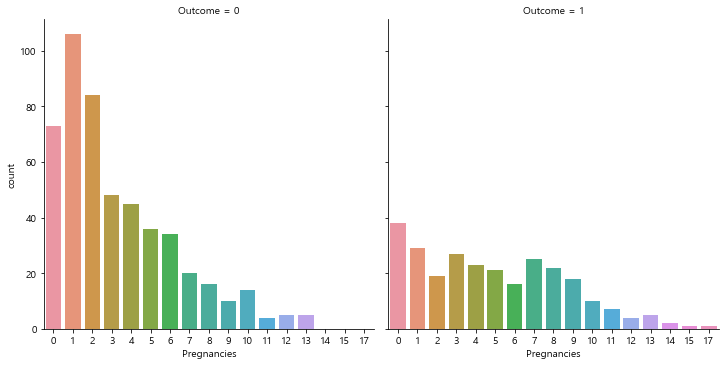

In [133]:
sns.catplot(x = 'Pregnancies', col = 'Outcome', kind = 'count', data = df_diabete)

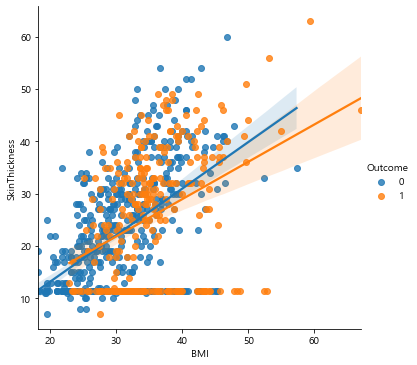

In [134]:
sns.lmplot(x = 'BMI', y = 'SkinThickness', data = df_diabete, hue = 'Outcome')

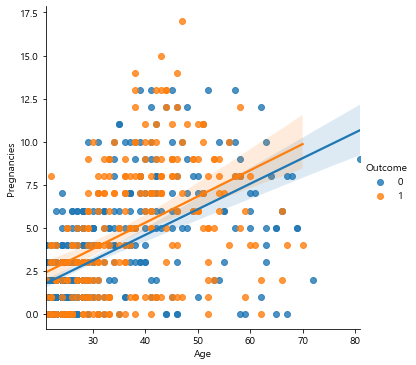

In [135]:
sns.lmplot(x = 'Age', y = 'Pregnancies', data = df_diabete, hue = 'Outcome')

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

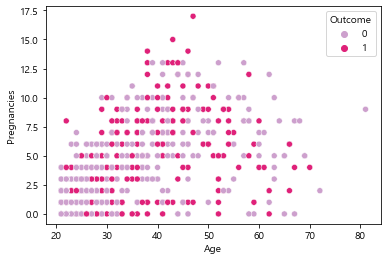

In [136]:
sns.scatterplot(x = 'Age', y = 'Pregnancies', data = df_diabete, hue='Outcome', palette="PuRd")

<AxesSubplot:xlabel='Age', ylabel='Glucose'>

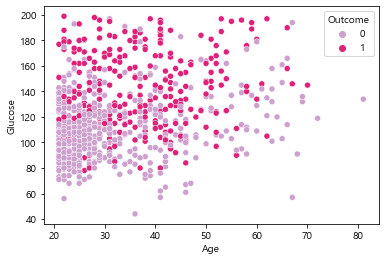

In [137]:
sns.scatterplot(x = 'Age', y = 'Glucose', data = df_diabete, hue='Outcome', palette="PuRd")

<AxesSubplot:xlabel='Glucose', ylabel='Insulin'>

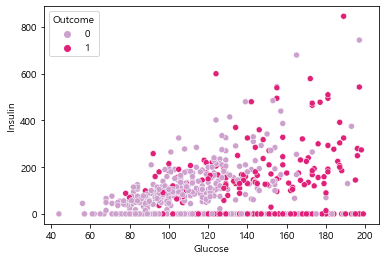

In [138]:
sns.scatterplot(x = 'Glucose', y = 'Insulin', data = df_diabete, hue='Outcome', palette="PuRd")

<AxesSubplot:xlabel='BMI', ylabel='Insulin'>

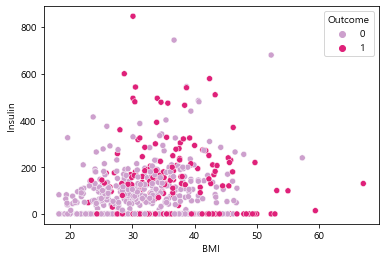

In [139]:
sns.scatterplot(x = 'BMI', y = 'Insulin', data = df_diabete, hue='Outcome', palette="PuRd")

<AxesSubplot:xlabel='Outcome', ylabel='Pregnancies'>

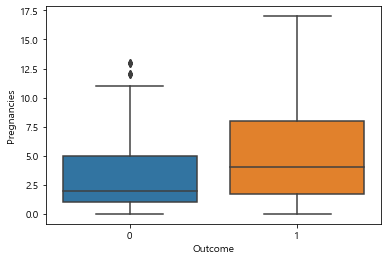

In [140]:
sns.boxplot(x = 'Outcome', y = 'Pregnancies', data = df_diabete)

<AxesSubplot:xlabel='Outcome', ylabel='Glucose'>

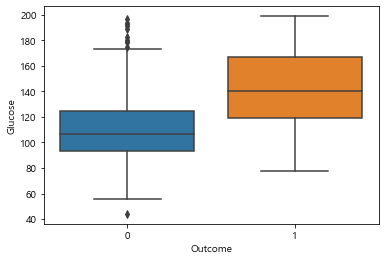

In [141]:
sns.boxplot(x = 'Outcome', y = 'Glucose', data = df_diabete)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

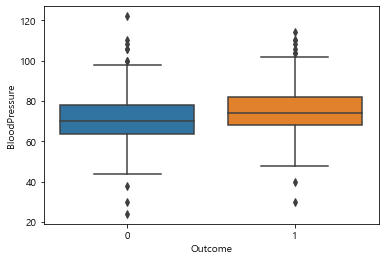

In [142]:
sns.boxplot(x = 'Outcome', y = 'BloodPressure', data = df_diabete)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

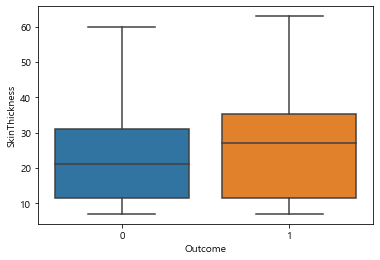

In [143]:
sns.boxplot(x = 'Outcome', y = 'SkinThickness', data = df_diabete) 

<AxesSubplot:xlabel='Outcome', ylabel='Insulin'>

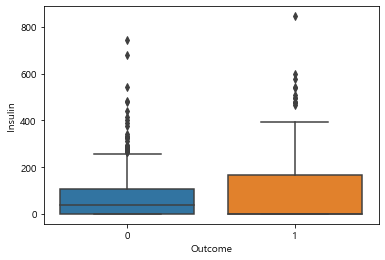

In [144]:
sns.boxplot(x = 'Outcome', y = 'Insulin', data = df_diabete)

<AxesSubplot:xlabel='Outcome', ylabel='BMI'>

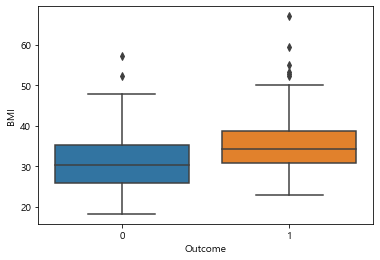

In [145]:
sns.boxplot(x = 'Outcome', y = 'BMI', data = df_diabete)

<AxesSubplot:xlabel='Outcome', ylabel='DiabetesPedigreeFunction'>

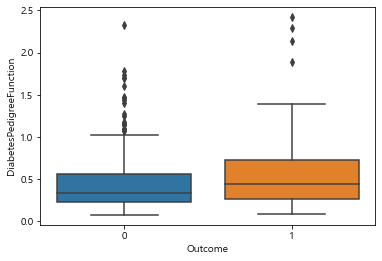

In [146]:
sns.boxplot(x = 'Outcome', y = 'DiabetesPedigreeFunction', data = df_diabete)

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

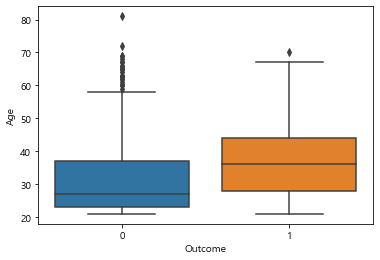

In [147]:
sns.boxplot(x = 'Outcome', y = 'Age', data = df_diabete)

<AxesSubplot:xlabel='Outcome', ylabel='AgeGroup'>

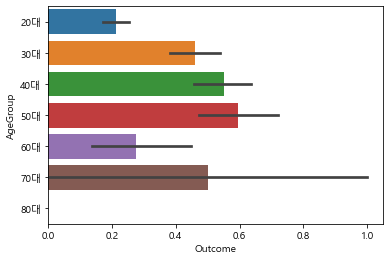

In [148]:
sns.barplot(x = 'Outcome', y = 'AgeGroup', data = df_diabete)

In [149]:
corr = df_diabete.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129894,0.208987,-0.038780,-0.073535,0.021519,-0.033523,0.544341,0.221898
Glucose,0.129894,1.000000,0.221900,0.095291,0.334878,0.230212,0.138690,0.268431,0.489010
BloodPressure,0.208987,0.221900,1.000000,0.080434,-0.035220,0.281059,0.001418,0.327222,0.161838
SkinThickness,-0.038780,0.095291,0.080434,1.000000,0.402482,0.477871,0.180620,-0.076093,0.115563
Insulin,-0.073535,0.334878,-0.035220,0.402482,1.000000,0.186121,0.185071,-0.042163,0.130548
BMI,0.021519,0.230212,0.281059,0.477871,0.186121,1.000000,0.153633,0.026042,0.312651
DiabetesPedigreeFunction,-0.033523,0.138690,0.001418,0.180620,0.185071,0.153633,1.000000,0.033561,0.173844
Age,0.544341,0.268431,0.327222,-0.076093,-0.042163,0.026042,0.033561,1.000000,0.238356
Outcome,0.221898,0.489010,0.161838,0.115563,0.130548,0.312651,0.173844,0.238356,1.000000


<AxesSubplot:>

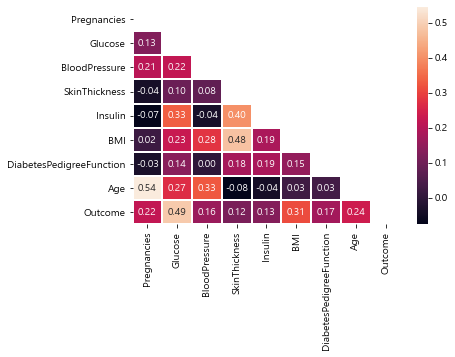

In [150]:
mask = np.triu(np.ones_like(corr, dtype = bool))
sns.heatmap(corr, annot = True, mask = mask, fmt = '.2f', linewidths = 1)